In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import simple_angles_dataset_generator as simple_angles_gen
from mcu_original import MCUOriginalModel
import dataset_generator
from mcu_experiments import MCUexperiments
from mcu_plots import MCUplots

In [3]:
figure_num = 10**4
figure_point_cnt = 1000
deterministic_param_scatter = False
p = 4
noise_level = 0
lw = np.array([10, -85, 0, -85])
up = np.array([170, 85, 170, 85])
param_names = np.array(["inside_angle", "rotation_angle_x", "rotation_angle_y", "rotation_angle_z"])
control_vars = dataset_generator.get_control_vars(deterministic=deterministic_param_scatter, dimensionality=p,
                                                  size=figure_num,
                                                  lw=lw, up=up)
control_vars_dict = dataset_generator.put_control_vars_in_dict(control_vars, p, param_names)
figures = dataset_generator.generate_array_of_figures(control_vars_dict, simple_angles_gen.generate_angles_points,
                                                      noise_level=noise_level, min_num_points=figure_point_cnt)
mcu_model = MCUOriginalModel(k=5, c=10000, figures=figures, params=control_vars, params_names=param_names)


In [ ]:
mcu_model.train(max_iters=1000)
print(f"rre_median_embedding_vs_params: {mcu_model.compute_rre_median_embedding_vs_params()}")

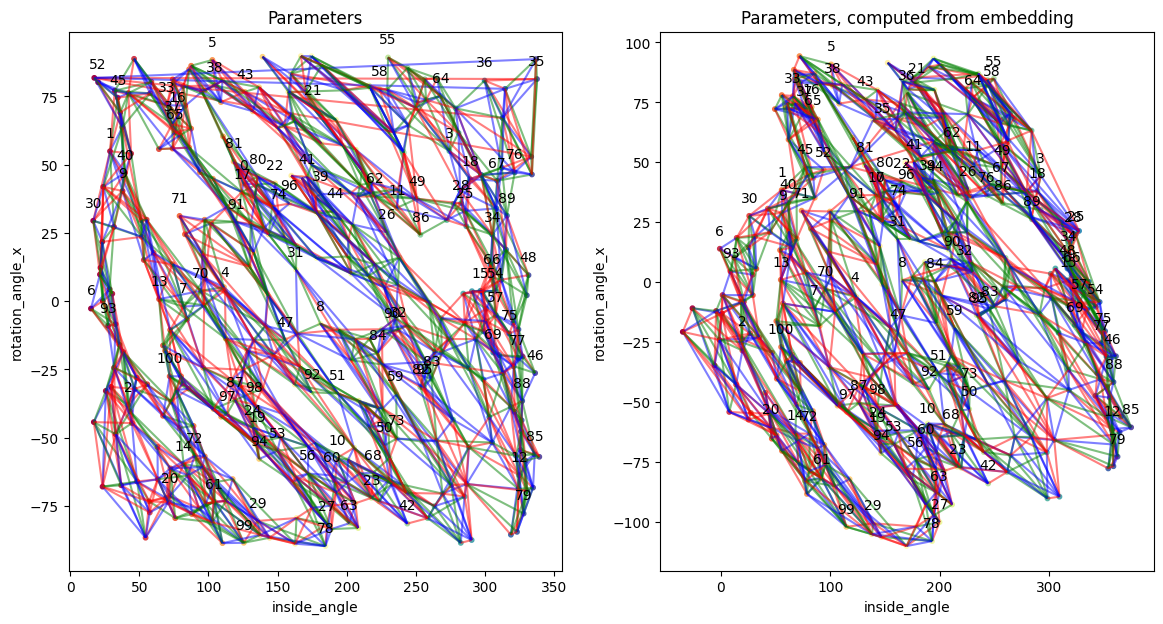

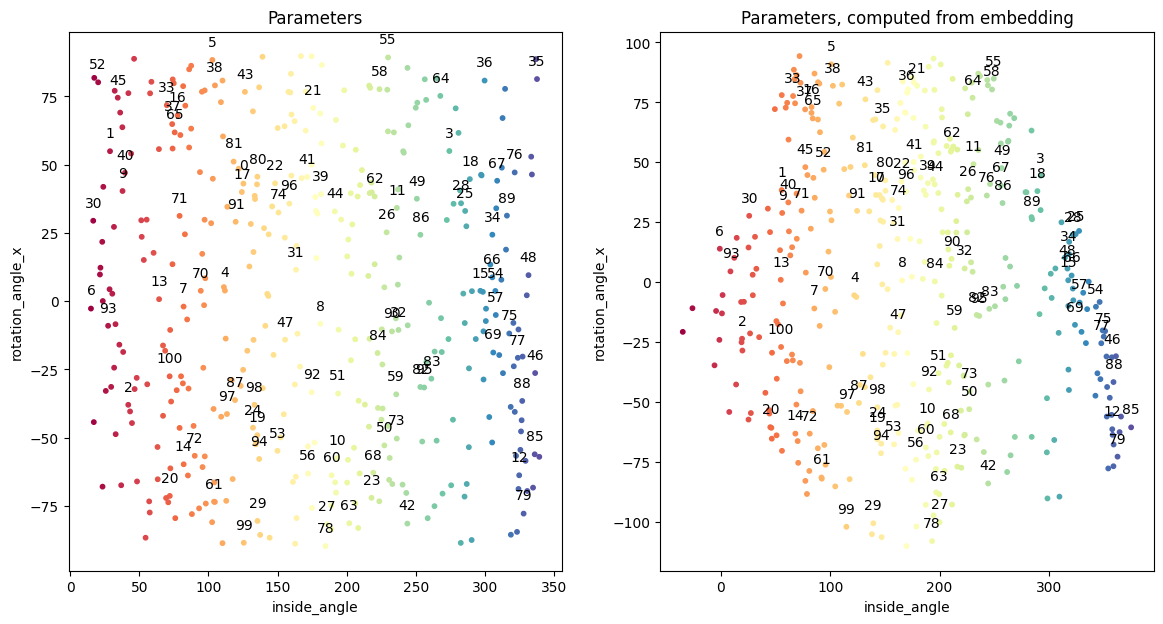

In [17]:
mcu_plots = MCUplots(mcu_model)
mcu_plots.plot_embeddings_vs_parameters(with_edges=False, annotate=True)
mcu_plots.plot_embeddings_vs_parameters(with_edges=True, annotate=True)

In [18]:
mcu_experiments = MCUexperiments(mcu_model)
interval_runs, intervals = mcu_experiments.test_predictive_optimization(lw, up, simple_angles_gen.generate_angles_points, figure_point_cnt, noise_level, pieces_cnt=4, test_data_size=10, same_value=False)

Finding neighbors: 1 ms , optimization: 1 ms
-----------
x_opt  = [  9.48904638 -57.22389155], x_err = 106.359057275796
x_real = [ 46.60185452 -83.91743803]
Finding neighbors: 1 ms , optimization: 1 ms
-----------
x_opt  = [  9.48904638 -59.3454482 ], x_err = 618.6631600625731
x_real = [ 35.49128738 -78.87648787]
Finding neighbors: 1 ms , optimization: 0 ms
-----------
x_opt  = [122.77034577 -40.20250772], x_err = 57829.57519228097
x_real = [ 18.18065886 -81.03366151]
Finding neighbors: 1 ms , optimization: 1 ms
-----------
x_opt  = [  9.48904638 -48.14928714], x_err = 1007.464503940091
x_real = [ 23.55775511 -72.27585728]
Finding neighbors: 1 ms , optimization: 1 ms
-----------
x_opt  = [  9.48904638 -51.46832584], x_err = 150.08773738048998
x_real = [ 43.99988133 -78.55080054]
Finding neighbors: 1 ms , optimization: 1 ms
-----------
x_opt  = [  9.48904638 -57.33040799], x_err = 710.9917443559003
x_real = [ 35.26117874 -74.48458506]
Finding neighbors: 1 ms , optimization: 1 ms
-------

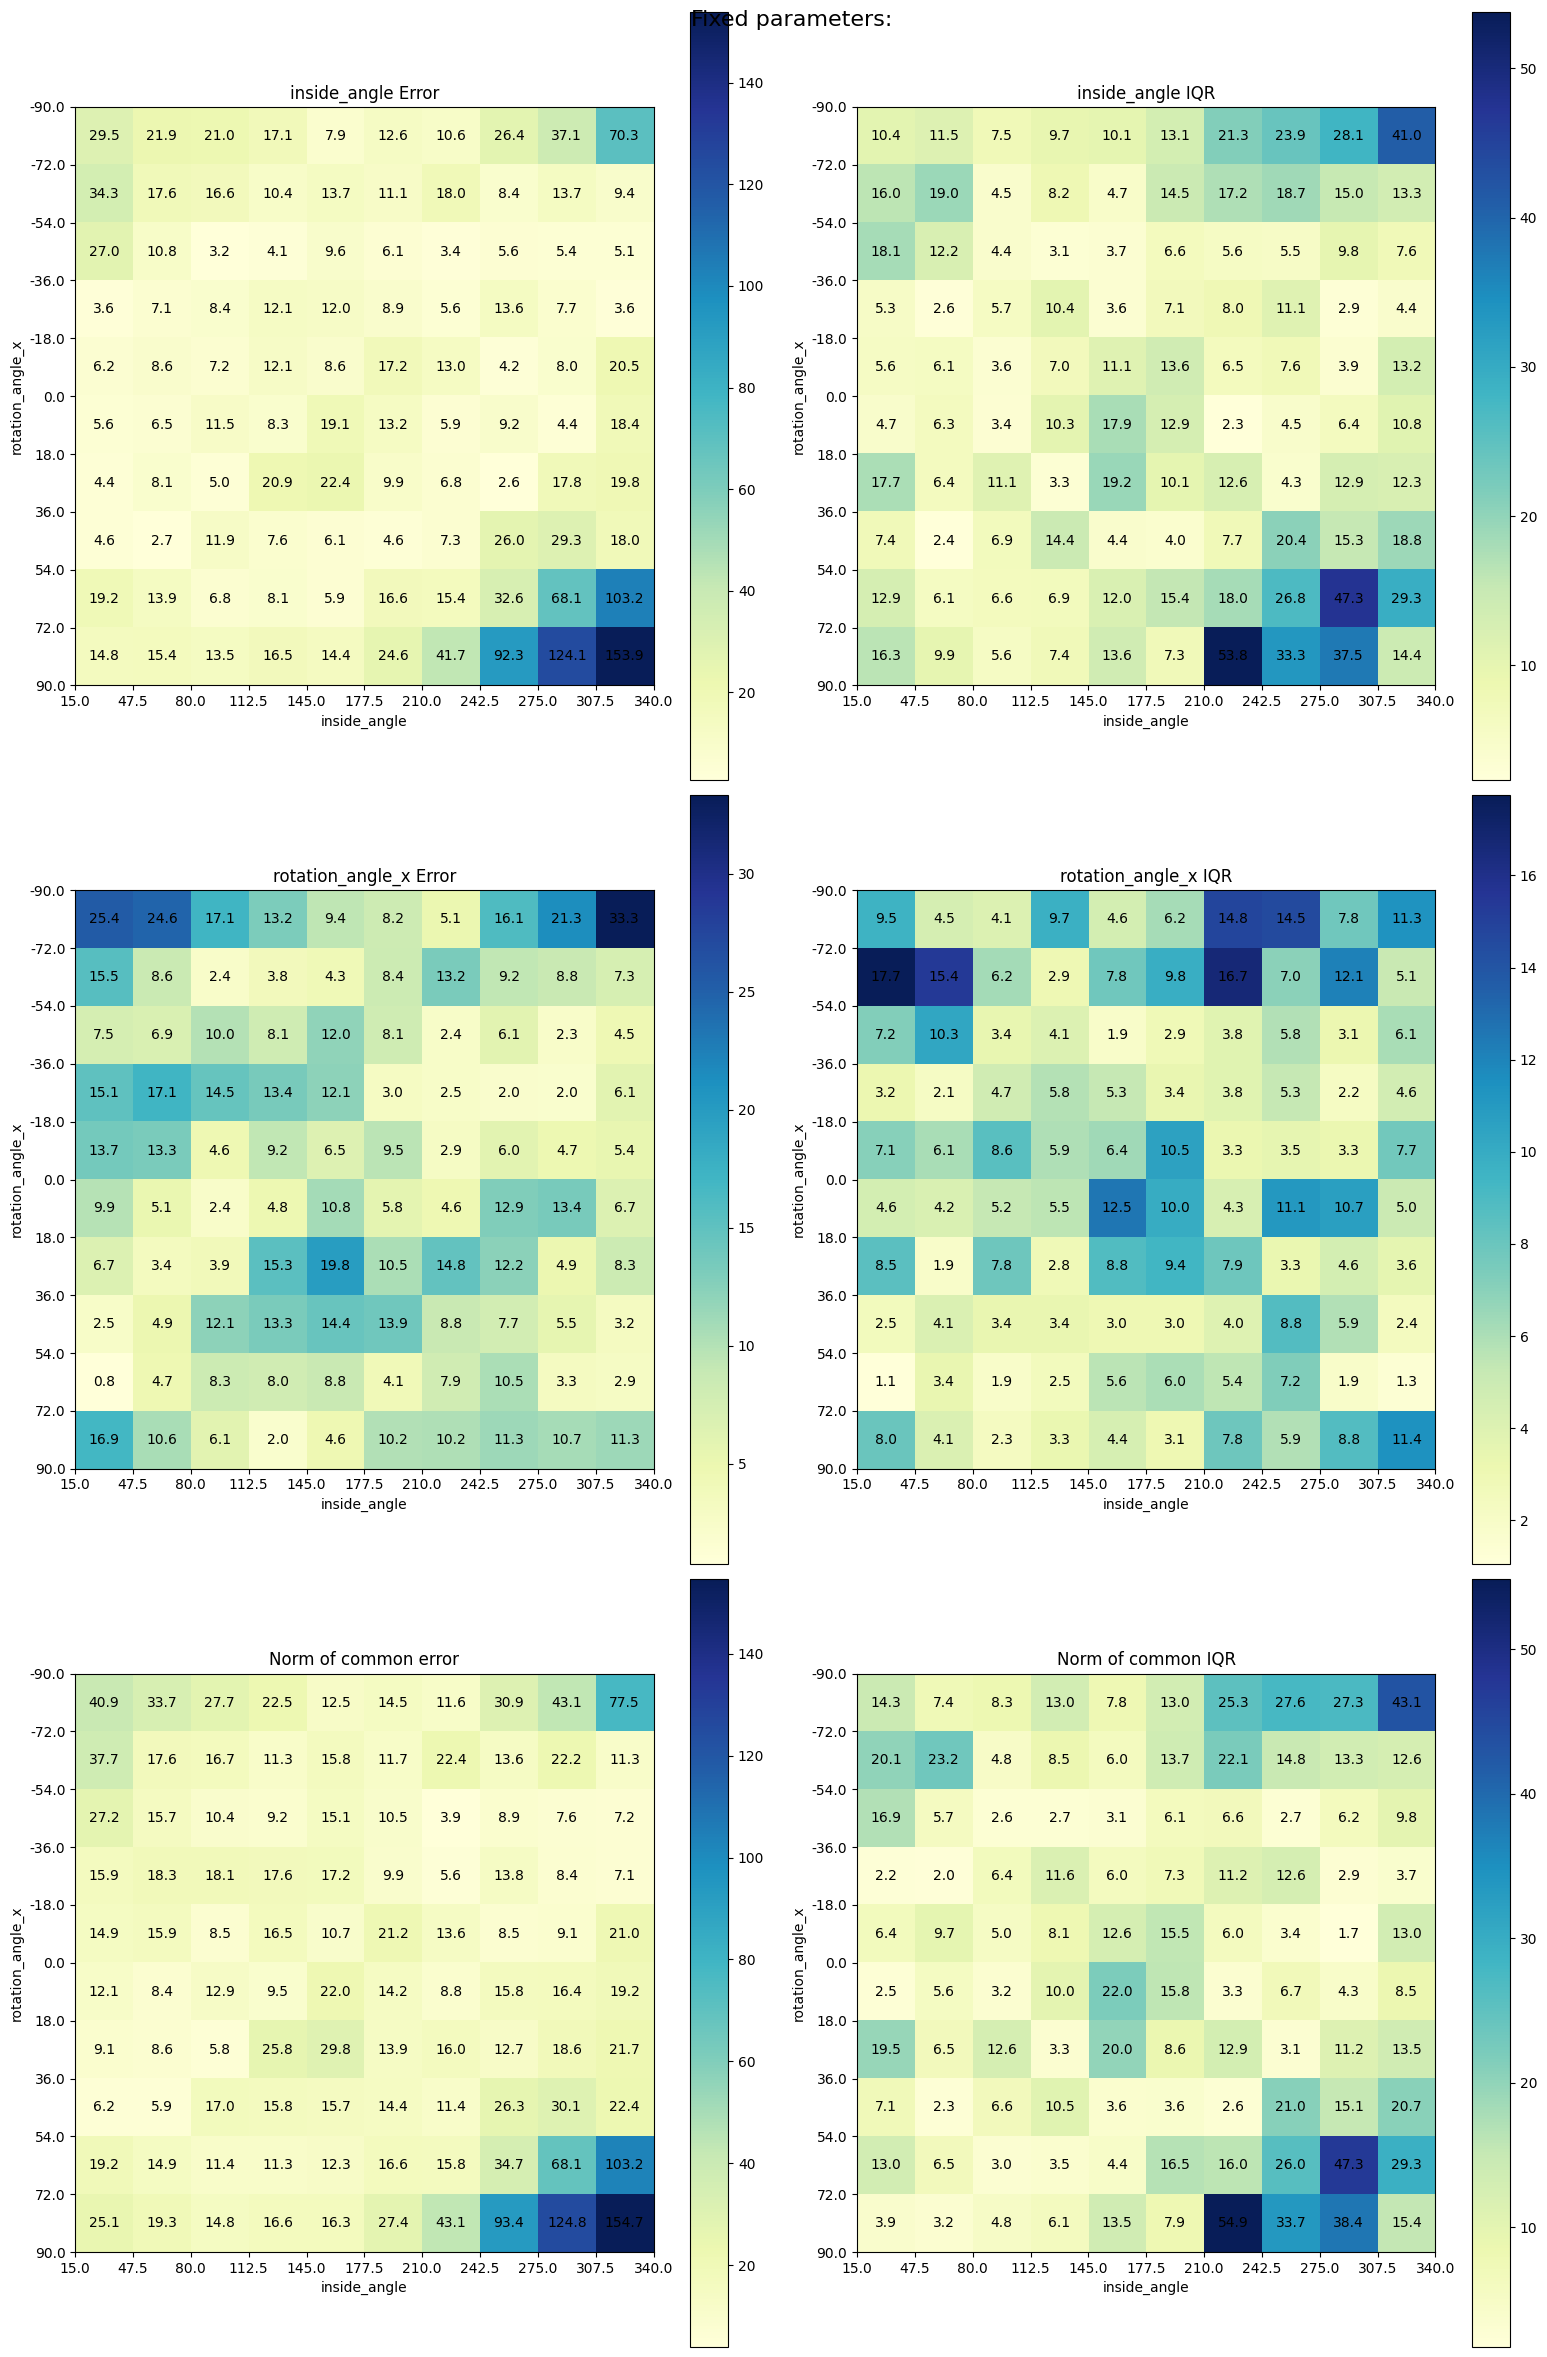

In [19]:
mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals, interval_runs)

28.537808058369038 121.20450821198536 -1.4578264571821222 44.454005725279146


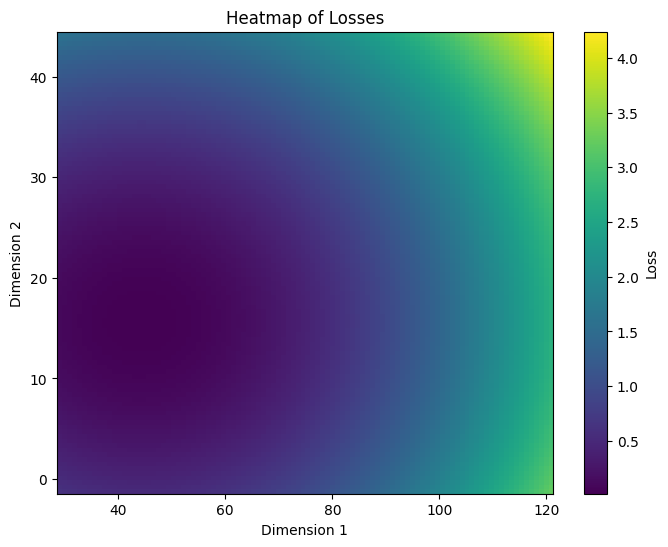

Finding neighbors: 885 ms , optimization: 167 ms
x_opt = [43.78595537 15.57136088], x_err = 0.01698502067082139
x_real = [45 15]
28.537808058369038 121.20450821198536 -1.4578264571821222 44.454005725279146


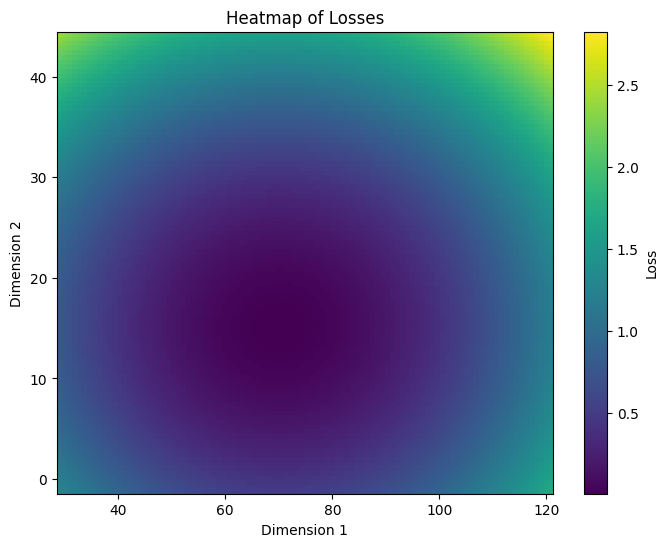

Finding neighbors: 707 ms , optimization: 162 ms
x_opt = [69.93192519 15.09417158], x_err = 0.004844861128824083
x_real = [70 15]


In [81]:
test_control_vars = np.array([[45, 15], [70, 15]])
test_control_vars_dict = dataset_generator.put_control_vars_in_dict(test_control_vars, p,
                                                                    mcu_model.params_names)
test_figures = dataset_generator.generate_array_of_figures(test_control_vars_dict, simple_angles_gen.generate_angles_points,
                                                           noise_level=noise_level,
                                                           min_num_points=1000)
x_opts = []
for (figure, control_var) in zip(test_figures, test_control_vars):
    x_opt, x_err = mcu_model.predict(figure, gd = False, plot_loss=True)
    print(f"x_opt = {x_opt}, x_err = {x_err}" )
    print(f"x_real = {control_var}")